In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=1)
config = tf.ConfigProto(gpu_options=gpu_options)
set_session(tf.Session(config=config))


from matplotlib import pyplot as pl
from PIL import Image
from keras import applications
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.utils import np_utils

def show_imgs(X):
    pl.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            pl.subplot2grid((4,4),(i,j))
            pl.imshow(Image.fromarray(X[k]))
            k = k+1
    # show the plot
    pl.show()

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
show_imgs(X_test[:16])  #shows the first 16 images of the test set
print('training input shape : ', X_train.shape)
print('training output shape: ', y_train.shape)
print('testing input shape  : ', X_test.shape)
print('testing output shape : ', y_test.shape)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print(Y_train[:10])


Using TensorFlow backend.


<Figure size 640x480 with 16 Axes>

training input shape :  (50000, 32, 32, 3)
training output shape:  (50000, 1)
testing input shape  :  (10000, 32, 32, 3)
testing output shape :  (10000, 1)
50000 train samples
10000 test samples
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [4]:

img_width, img_height = 32, 32

nb_train_samples = 50000
nb_validation_samples = 10000 
batch_size = 128
epochs = 10

model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

"""
Layer (type)                 Output Shape              Param #   
=================================================================
input_1 (InputLayer)         (None, 32, 32, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 64, 64, 256)       295168    
_________________________________________________________________
block3_conv2 (Conv2D)        (None, 64, 64, 256)       590080    
_________________________________________________________________
block3_conv3 (Conv2D)        (None, 64, 64, 256)       590080    
_________________________________________________________________
block3_conv4 (Conv2D)        (None, 64, 64, 256)       590080    
_________________________________________________________________
block3_pool (MaxPooling2D)   (None, 32, 32, 256)       0         
_________________________________________________________________
block4_conv1 (Conv2D)        (None, 32, 32, 512)       1180160   
_________________________________________________________________
block4_conv2 (Conv2D)        (None, 32, 32, 512)       2359808   
_________________________________________________________________
block4_conv3 (Conv2D)        (None, 32, 32, 512)       2359808   
_________________________________________________________________
block4_conv4 (Conv2D)        (None, 32, 32, 512)       2359808   
_________________________________________________________________
block4_pool (MaxPooling2D)   (None, 16, 16, 512)       0         
_________________________________________________________________
block5_conv1 (Conv2D)        (None, 16, 16, 512)       2359808   
_________________________________________________________________
block5_conv2 (Conv2D)        (None, 16, 16, 512)       2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        (None, 16, 16, 512)       2359808   
_________________________________________________________________
block5_conv4 (Conv2D)        (None, 16, 16, 512)       2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   (None, 8, 8, 512)         0         
=================================================================
Total params: 20,024,384.0
Trainable params: 20,024,384.0
Non-trainable params: 0.0
"""

# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
for layer in model.layers[:5]:
    layer.trainable = False

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(10, activation="softmax")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)
model_final.summary()
# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:76: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [5]:
# Initiate the train and test generators with data Augumentation 
train_datagen = ImageDataGenerator(
        #rotation_range=40,
        width_shift_range=0.08,
        height_shift_range=0.08,
#        rescale=1./255,
        shear_range=0.3,
        zoom_range=0.08,
#        horizontal_flip=True,
#        fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
        #rotation_range=40,
        width_shift_range=0.08,
        height_shift_range=0.08,
#        rescale=1./255,
        shear_range=0.3,
        zoom_range=0.08,
#        horizontal_flip=True,
#        fill_mode='nearest'
)


train_generator = train_datagen.flow(X_train, Y_train, batch_size=128)

validation_generator = test_datagen.flow(X_test, Y_test, batch_size=128)


# Save the model according to the conditions  
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')




In [13]:
log = model_final.fit(X_train,Y_train,batch_size=256,epochs=10,verbose=1,validation_data=(X_test,Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 45s 910us/step - loss: 0.6420 - acc: 0.7783 - val_loss: 0.6669 - val_acc: 0.7673
Epoch 2/10
50000/50000 [==============================] - 42s 849us/step - loss: 0.6291 - acc: 0.7849 - val_loss: 0.6593 - val_acc: 0.7719
Epoch 3/10
50000/50000 [==============================] - 42s 849us/step - loss: 0.6198 - acc: 0.7871 - val_loss: 0.6786 - val_acc: 0.7637
Epoch 4/10
50000/50000 [==============================] - 42s 850us/step - loss: 0.6063 - acc: 0.7913 - val_loss: 0.6506 - val_acc: 0.7717
Epoch 5/10
50000/50000 [==============================] - 42s 848us/step - loss: 0.5942 - acc: 0.7974 - val_loss: 0.6444 - val_acc: 0.7781
Epoch 6/10
50000/50000 [==============================] - 42s 848us/step - loss: 0.5882 - acc: 0.7976 - val_loss: 0.6307 - val_acc: 0.7795
Epoch 7/10
50000/50000 [==============================] - 42s 850us/step - loss: 0.5799 - acc: 0.8012 - val_loss: 0.

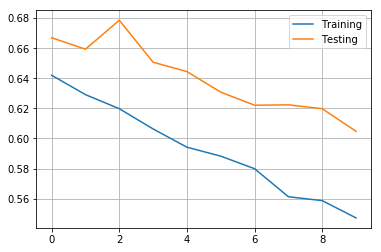

In [14]:
pl.plot(log.history['loss'], label='Training')
pl.plot(log.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

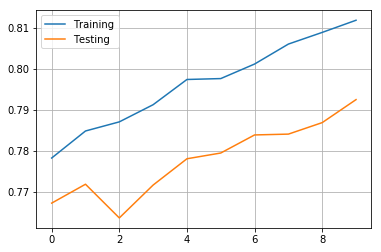

In [15]:
pl.plot(log.history['acc'], label='Training')
pl.plot(log.history['val_acc'], label='Testing')
pl.legend()
pl.grid()

In [17]:
loss_test, metric_test = model_final.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

#pred = model_final.predict_classes(X_test, verbose=1)
#me.confusion_matrix(y_test, pred)

10000/10000 [==============================] - 7s 660us/step
Test loss: 0.6047293885231018
Test accuracy: 0.7925


In [18]:
# Train the model 
model_final.fit_generator(
train_generator,
samples_per_epoch = nb_train_samples,
epochs = epochs,
validation_data = validation_generator,
nb_val_samples = nb_validation_samples,
callbacks = [checkpoint, early])

Epoch 1/10


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=390, callbacks=[<keras.ca..., validation_data=<keras_pre..., epochs=10, validation_steps=10000)`
  


389/390 [============================>.] - ETA: 0s - loss: 0.6533 - acc: 0.7744

KeyboardInterrupt: 